In [85]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import plotly.graph_objects as go # Plotly graph objects
import warnings #handle warning messages 
warnings.filterwarnings('ignore') #ignore warning mes 

In [86]:
#load the data
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [87]:
#checking the columns name
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [88]:
#Checking the data shape
print(f'Data: {df.shape[0]} rows, {df.shape[1]} columns')

Data: 8807 rows, 12 columns


In [89]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [90]:
# Checking the null values in the dataset
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [91]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [92]:
# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)
# Visualize the correlation matrix using seaborn's heatmap
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.show()

              release_year
release_year           1.0


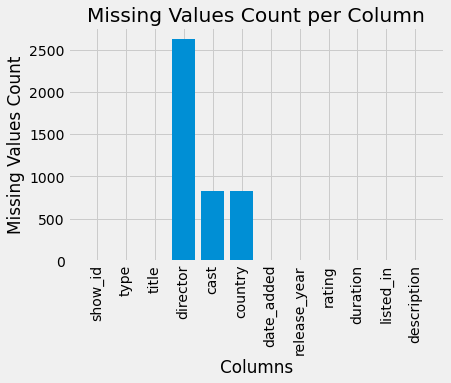

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv("netflix_titles.csv")

# Count missing values in each column
missing_values_count = df.isnull().sum()

# Plotting using matplotlib
plt.bar(missing_values_count.index, missing_values_count.values)
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.title('Missing Values Count per Column')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [66]:
# Remove missing values from the DataFrame
netflix = df.dropna()

# After removing missing values, check the data shape
print("The dataset contains {} rows and {} columns".format(netflix.shape[0], netflix.shape[1]))

The dataset contains 5332 rows and 12 columns


In [67]:
# Checking the duplicate values in the data
duplicate_values = df.duplicated().sum()
print("The data contains {} duplicate values".format(duplicate_values))

The data contains 0 duplicate values


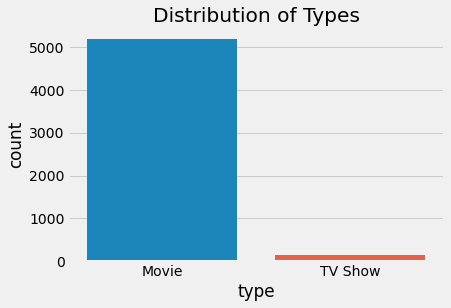

In [68]:
# Create a count plot for the 'type' column
sns.countplot(data=netflix, x='type')

# Set the title of the plot
plt.title('Distribution of Types')

# Display the plot
plt.show()

In [74]:
# Select rows where 'type' is 'Movie'
movie = netflix[netflix['type'] == 'Movie']

In [75]:
# Remove 'min' suffix from values in the 'duration' column and convert to integers
movie['duration'] = movie['duration'].str.replace(' min', '').astype(int)

In [76]:
# Find the index of the row with the minimum duration
min_duration_index = movie['duration'].idxmin()

# Get the corresponding release year and duration
corresponding_min_release_year = movie.loc[min_duration_index, 'release_year']
min_duration = movie.loc[min_duration_index, 'duration']

print(f"The movie with the minimum duration of {min_duration} minutes was released in the year {corresponding_min_release_year}.")

# Find the index of the row with the maximum duration
max_duration_index = movie['duration'].idxmax()

# Get the corresponding release year and duratio
corresponding_max_release_year = movie.loc[max_duration_index, 'release_year']
max_duration = movie.loc[max_duration_index, 'duration']

print(f"The movie with the maximum duration of {max_duration} minutes was released in the year {corresponding_max_release_year}.")

The movie with the minimum duration of 8 minutes was released in the year 2020.
The movie with the maximum duration of 253 minutes was released in the year 1973.


In [79]:
# Importing pandas library
import pandas as pd

# Count the occurrences of each unique entry in the 'listed_in' column
genre_counts = movie['listed_in'].value_counts()

# Display the genre counts
print("Genre Counts:")
print(genre_counts)

Genre Counts:
Dramas, International Movies                                        336
Stand-Up Comedy                                                     286
Comedies, Dramas, International Movies                              257
Dramas, Independent Movies, International Movies                    243
Children & Family Movies, Comedies                                  179
                                                                   ... 
Action & Adventure, Children & Family Movies, Independent Movies      1
LGBTQ Movies, Thrillers                                               1
Sci-Fi & Fantasy                                                      1
Children & Family Movies, Comedies, Cult Movies                       1
Cult Movies, Dramas, Thrillers                                        1
Name: listed_in, Length: 268, dtype: int64


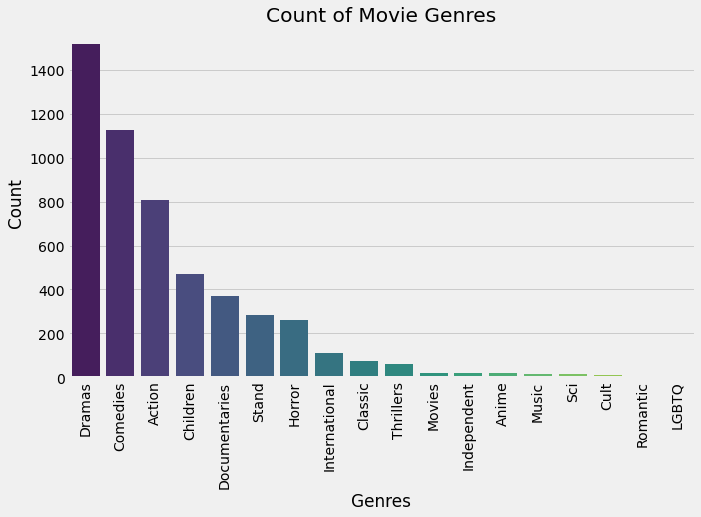

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract genres from the 'listed_in' column
movie['genres'] = movie['listed_in'].str.extract('([A-Z]\w{2,})', expand=True)

# Count the occurrences of each genre
genre_counts_movie = movie['genres'].value_counts().reset_index()

# Rename the columns to 'genre' and 'count'
genre_counts_movie.columns = ['genre', 'count']

# Create a bar plot of genre counts
plt.figure(figsize=(10, 6))
sns.countplot(data=movie, x='genres', order=genre_counts_movie['genre'], palette='viridis')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Count of Movie Genres')
plt.xticks(rotation=90)
plt.show()

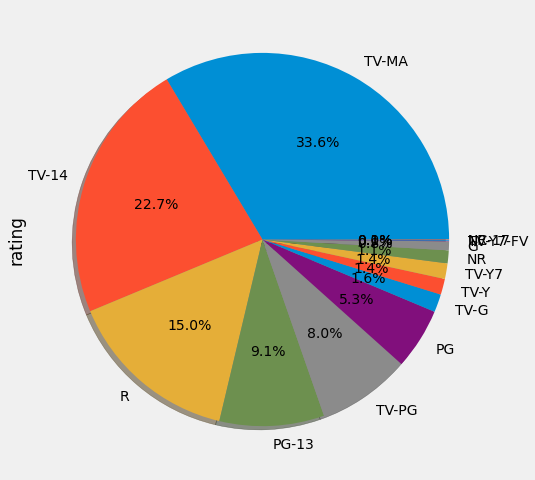

In [82]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Plot a pie chart to visualize the distribution of movie ratings
movie['rating'].value_counts().plot.pie(
    autopct='%1.1f%%',  # Add percentage labels to each wedge
    shadow=True,  # Add shadow effect to the pie chart
    figsize=(10, 8)  # Set the size of the figure
)

# Display the pie chart
plt.show()

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

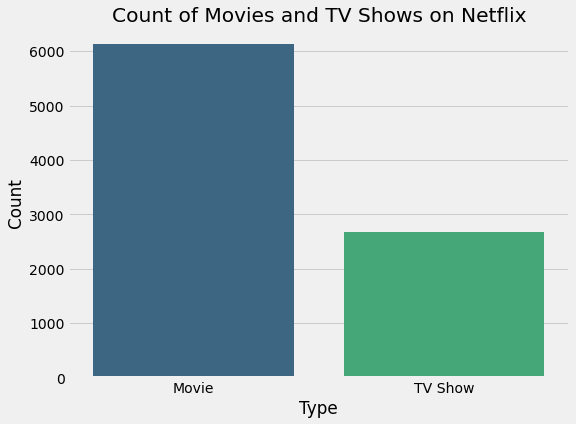

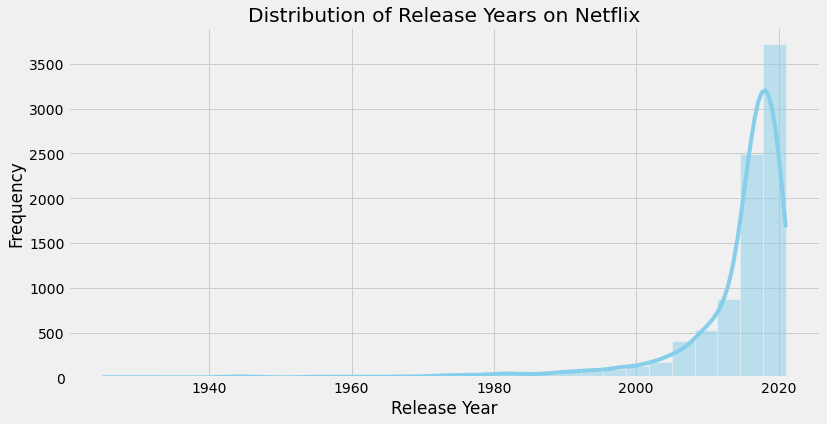

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Netflix dataset
netflix_titles = pd.read_csv('netflix_titles.csv')

# Display the first few rows of the dataset
print(netflix_titles.head())

# Check the shape of the dataset
print("Shape of the dataset:", netflix_titles.shape)

# Check for missing values
print("Missing values:\n", netflix_titles.isnull().sum())

# Data analysis and visualization
# Example: Count the number of movies and TV shows
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=netflix_titles, palette='viridis')
plt.title('Count of Movies and TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Example: Visualize the distribution of release years
plt.figure(figsize=(12, 6))
sns.histplot(netflix_titles['release_year'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Release Years on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()